In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Importing MNSIT dataset(Gray Scale Image dataset)
data = pd.read_csv('train.csv')
data.head()
# label values availbale from 1-9
# Pixel columns aer 0-783
# values of pixel columns ranging from 0-255 (closer to 0 it is white and closest to 255 is darkest)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [5]:
label = data['label']
data_x = data.drop(columns='label', axis = 1)

In [6]:
print(label.shape)
print(data_x.shape)

(42000,)
(42000, 784)


In [7]:
data['label'][1]

0

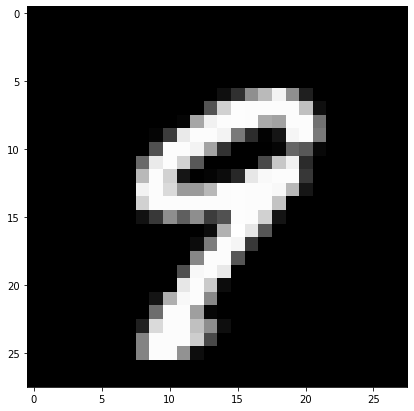

In [18]:
plt.figure(figsize=(7,7))
grid_data = data_x.iloc[11].values.reshape(28,28)
plt.imshow(grid_data, interpolation="none", cmap = "gray")
plt.show()

In [20]:
labels = label.head(15000)
data_x = data_x.head(15000)

print(f"The shape of our data - > {data_x.shape}")

The shape of our data - > (15000, 784)


In [21]:
from sklearn.preprocessing import StandardScaler

standard_data = StandardScaler().fit_transform(data_x)

print(standard_data.shape)

(15000, 784)


In [22]:
# Finding Covariance Matrix - A^T*A
# How much each dimension vary with other dimension
# 0 value means it is independent of each other

sample_data = standard_data

covar_matrix = np.matmul(sample_data.T, sample_data)

print(f"The shape of variance matrix = {covar_matrix.shape}")

The shape of variance matrix = (784, 784)


In [30]:
# Computing Eigen values and Eigen vectors

from scipy.linalg import eigh

#eigh function will retrun the eigen values in ascending order
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print(f"Shape of eigen vectors -> {vectors.shape}")

vectors = vectors.T

print(f"Updated Shape of our Vector -> {vectors.shape}")

Shape of eigen vectors -> (784, 2)
Updated Shape of our Vector -> (2, 784)


In [31]:
new_coordinates = np.matmul(vectors, sample_data.T)

print(f"Resultant new data points shape -> {vectors.shape} X {sample_data.T.shape} = {new_coordinates.shape}")

Resultant new data points shape -> (2, 784) X (784, 15000) = (2, 15000)


In [32]:
# Appending label to the 2d Projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))

print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


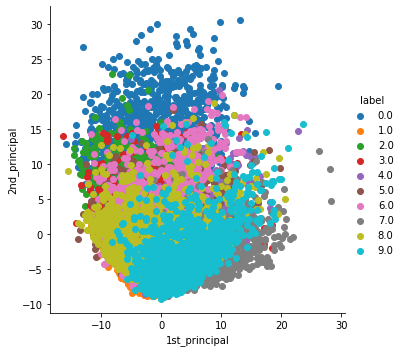

In [38]:
import seaborn as sns
sns.FacetGrid(dataframe, hue = "label",height=5).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [39]:
from sklearn import decomposition
pca = decomposition.PCA()

In [41]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print(f"Shape of pca_reduced shape = {pca_data.shape}")

Shape of pca_reduced shape = (15000, 2)


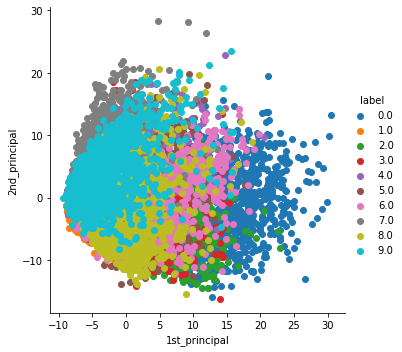

In [43]:
pca_data = np.vstack((pca_data.T, labels)).T

pca_df = pd.DataFrame(data = pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue = "label", height=5).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()
plt.show()